<a href="https://colab.research.google.com/github/ashleighr01/MLA_AMR/blob/main/MLA4_AMR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Machine Learning Assignment 4**
*Ashleigh Rufus*

#*Import Specific Models*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
from sklearn import tree
from sklearn.tree import export_text

In [4]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [5]:
from sklearn import set_config
set_config(display='diagram')

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error

In [7]:
def plot_cm(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  fig = plt.figure(figsize=(10,10))
  heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
  plt.ylabel('True label')
  plt.xlabel('Predicted Label')

In [8]:
def abline(slope, intercept, color):
  axes = plt.gca()
  x_vals = np.array(axes.get_xlim())
  y_vals = intercept + slope * x_vals
  plt.plot(x_vals, y_vals, '--', c=color)

#**DecisionTree Classification**

#*Acquire Data--DecisionTree Classification*

In [9]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/banknote_authentication.csv')

In [10]:
df

,variance,skewness,curtosis,entropy,forgery
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


#*Splitting Data into Train/Test*

In [11]:
X = df.iloc[:,0:-1]
y = df[['forgery']]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=24)

#*Building the Pipeline*

In [13]:
num_attribs = ['variance', 'skewness', 'curtosis', 'entropy']

In [14]:
col_transform = ColumnTransformer(transformers=[
                                                ('num', MinMaxScaler(), num_attribs)],
                                                remainder='passthrough')

In [15]:
pipeline = Pipeline([
                     ('trans', col_transform),
                     ('decision_tree', tree.DecisionTreeClassifier(max_depth=5))
])

#*Executing the Model*

In [16]:
pipeline.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('decision_tree', DecisionTreeClassifier(max_depth=5))])

#*Evaluating the Model*

In [17]:
y_pred = pipeline.predict(X_test)

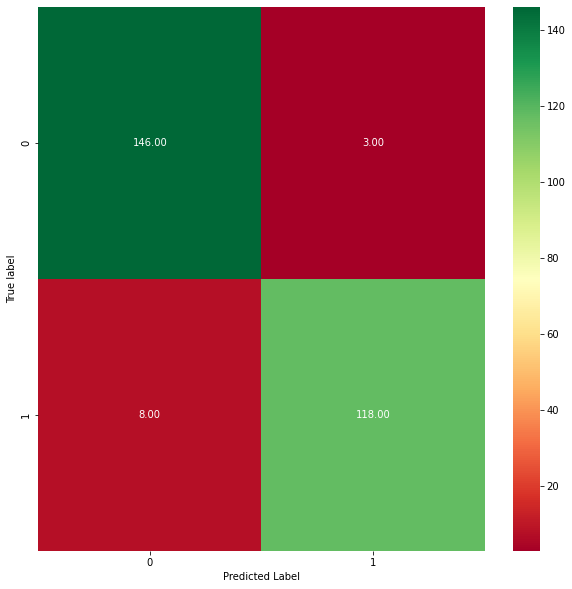

In [18]:
plot_cm(y_test, y_pred)

In [19]:
print("Precision Score: ", precision_score(y_test,y_pred))  
print("Recall Score:", recall_score(y_test,y_pred))
print("F1 Score:", f1_score(y_test,y_pred))

Precision Score:  0.9752066115702479
Recall Score: 0.9365079365079365
F1 Score: 0.9554655870445344


*Output Reflection*

The scores all turned out very well. With the confusion matrix, we see that there are approximately 11 occurrences of the true label and predicted label not being the same. There is a possibility that the model is actually overfitting the data, but it does not seem probable here. 

#*Conclusion--DecisionTree Classification*

This model does seem suitable for predicting a forgery on banknotes. With the numerical attributes, predictions seemed accurate for the testing data as well as classification of the outcome (forgery or not).

#**DecisionTree Regression**

#*Acquire Data--DecisionTree Regression*

In [20]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/Steel_industry_data.csv')

In [21]:
df.rename(columns={"Usage_kWh":"usage_kwh", "Lagging_Current_Reactive.Power_kVarh":"lag_react_pwr_kvarh", "Leading_Current_Reactive_Power_kVarh":"lead_react_pwr_kvarh", "Lagging_Current_Power_Factor":"lag_current_pwr", "Leading_Current_Power_Factor":"lead_current_pwr", "NSM":"nsm", "WeekStatus":"week_status", "Day_of_week":"day_of_week", "Load_Type":"load_type"}, inplace=True)

In [22]:
df.head()

,date,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm,week_status,day_of_week,load_type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


#*Splitting Data into Train/Test*

In [23]:
X = df.iloc[:, 2:]
y = df[['usage_kwh']]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=24)

#*Building the Pipeline*

In [27]:
cat_attribs = ['week_status', 'day_of_week', 'load_type']
num_attribs = ['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'CO2(tCO2)', 'lag_current_pwr', 'lead_current_pwr', 'nsm']

In [28]:
col_transform = ColumnTransformer(transformers=[
                                  ('cat', OneHotEncoder(), cat_attribs),
                                  ('num', MinMaxScaler(), num_attribs),
])

In [29]:
pipeline = Pipeline([
                    ('trans', col_transform),
                    ('regress', tree.DecisionTreeRegressor(max_depth=5))
])

#*Executing the Model*

In [30]:
pipeline.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['week_status', 'day_of_week',
                                                   'load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr',
                                                   'nsm'])])),
                ('regress', DecisionTreeRegressor(max_depth=5))])

#*Evaluating the Model*

In [33]:
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

In [34]:
print("Root mean square error for train: ", (mean_squared_error(y_train, y_train_pred)**(0.5)))
print("Root mean square error for test: ", (mean_squared_error(y_test, y_test_pred)**(0.5)))

Root mean square error for train:  3.541903987587041
Root mean square error for test:  3.5099727414812874


[Text(0.5, 0.9166666666666666, 'X[14] <= 0.214\nsamples = 28032\nvalue = 27.466'),
 Text(0.25, 0.75, 'X[14] <= 0.071\nsamples = 17976\nvalue = 5.386'),
 Text(0.125, 0.5833333333333334, 'X[12] <= 0.234\nsamples = 16764\nvalue = 3.901'),
 Text(0.0625, 0.4166666666666667, 'X[12] <= 0.118\nsamples = 16740\nvalue = 3.758'),
 Text(0.03125, 0.25, 'X[9] <= 0.5\nsamples = 16734\nvalue = 3.747'),
 Text(0.015625, 0.08333333333333333, 'samples = 3690\nvalue = 4.767'),
 Text(0.046875, 0.08333333333333333, 'samples = 13044\nvalue = 3.459'),
 Text(0.09375, 0.25, 'X[13] <= 0.021\nsamples = 6\nvalue = 34.228'),
 Text(0.078125, 0.08333333333333333, 'samples = 5\nvalue = 25.724'),
 Text(0.109375, 0.08333333333333333, 'samples = 1\nvalue = 76.75'),
 Text(0.1875, 0.4166666666666667, 'X[12] <= 0.406\nsamples = 24\nvalue = 103.212'),
 Text(0.15625, 0.25, 'X[9] <= 0.5\nsamples = 11\nvalue = 77.974'),
 Text(0.140625, 0.08333333333333333, 'samples = 9\nvalue = 84.384'),
 Text(0.171875, 0.08333333333333333, 'sam

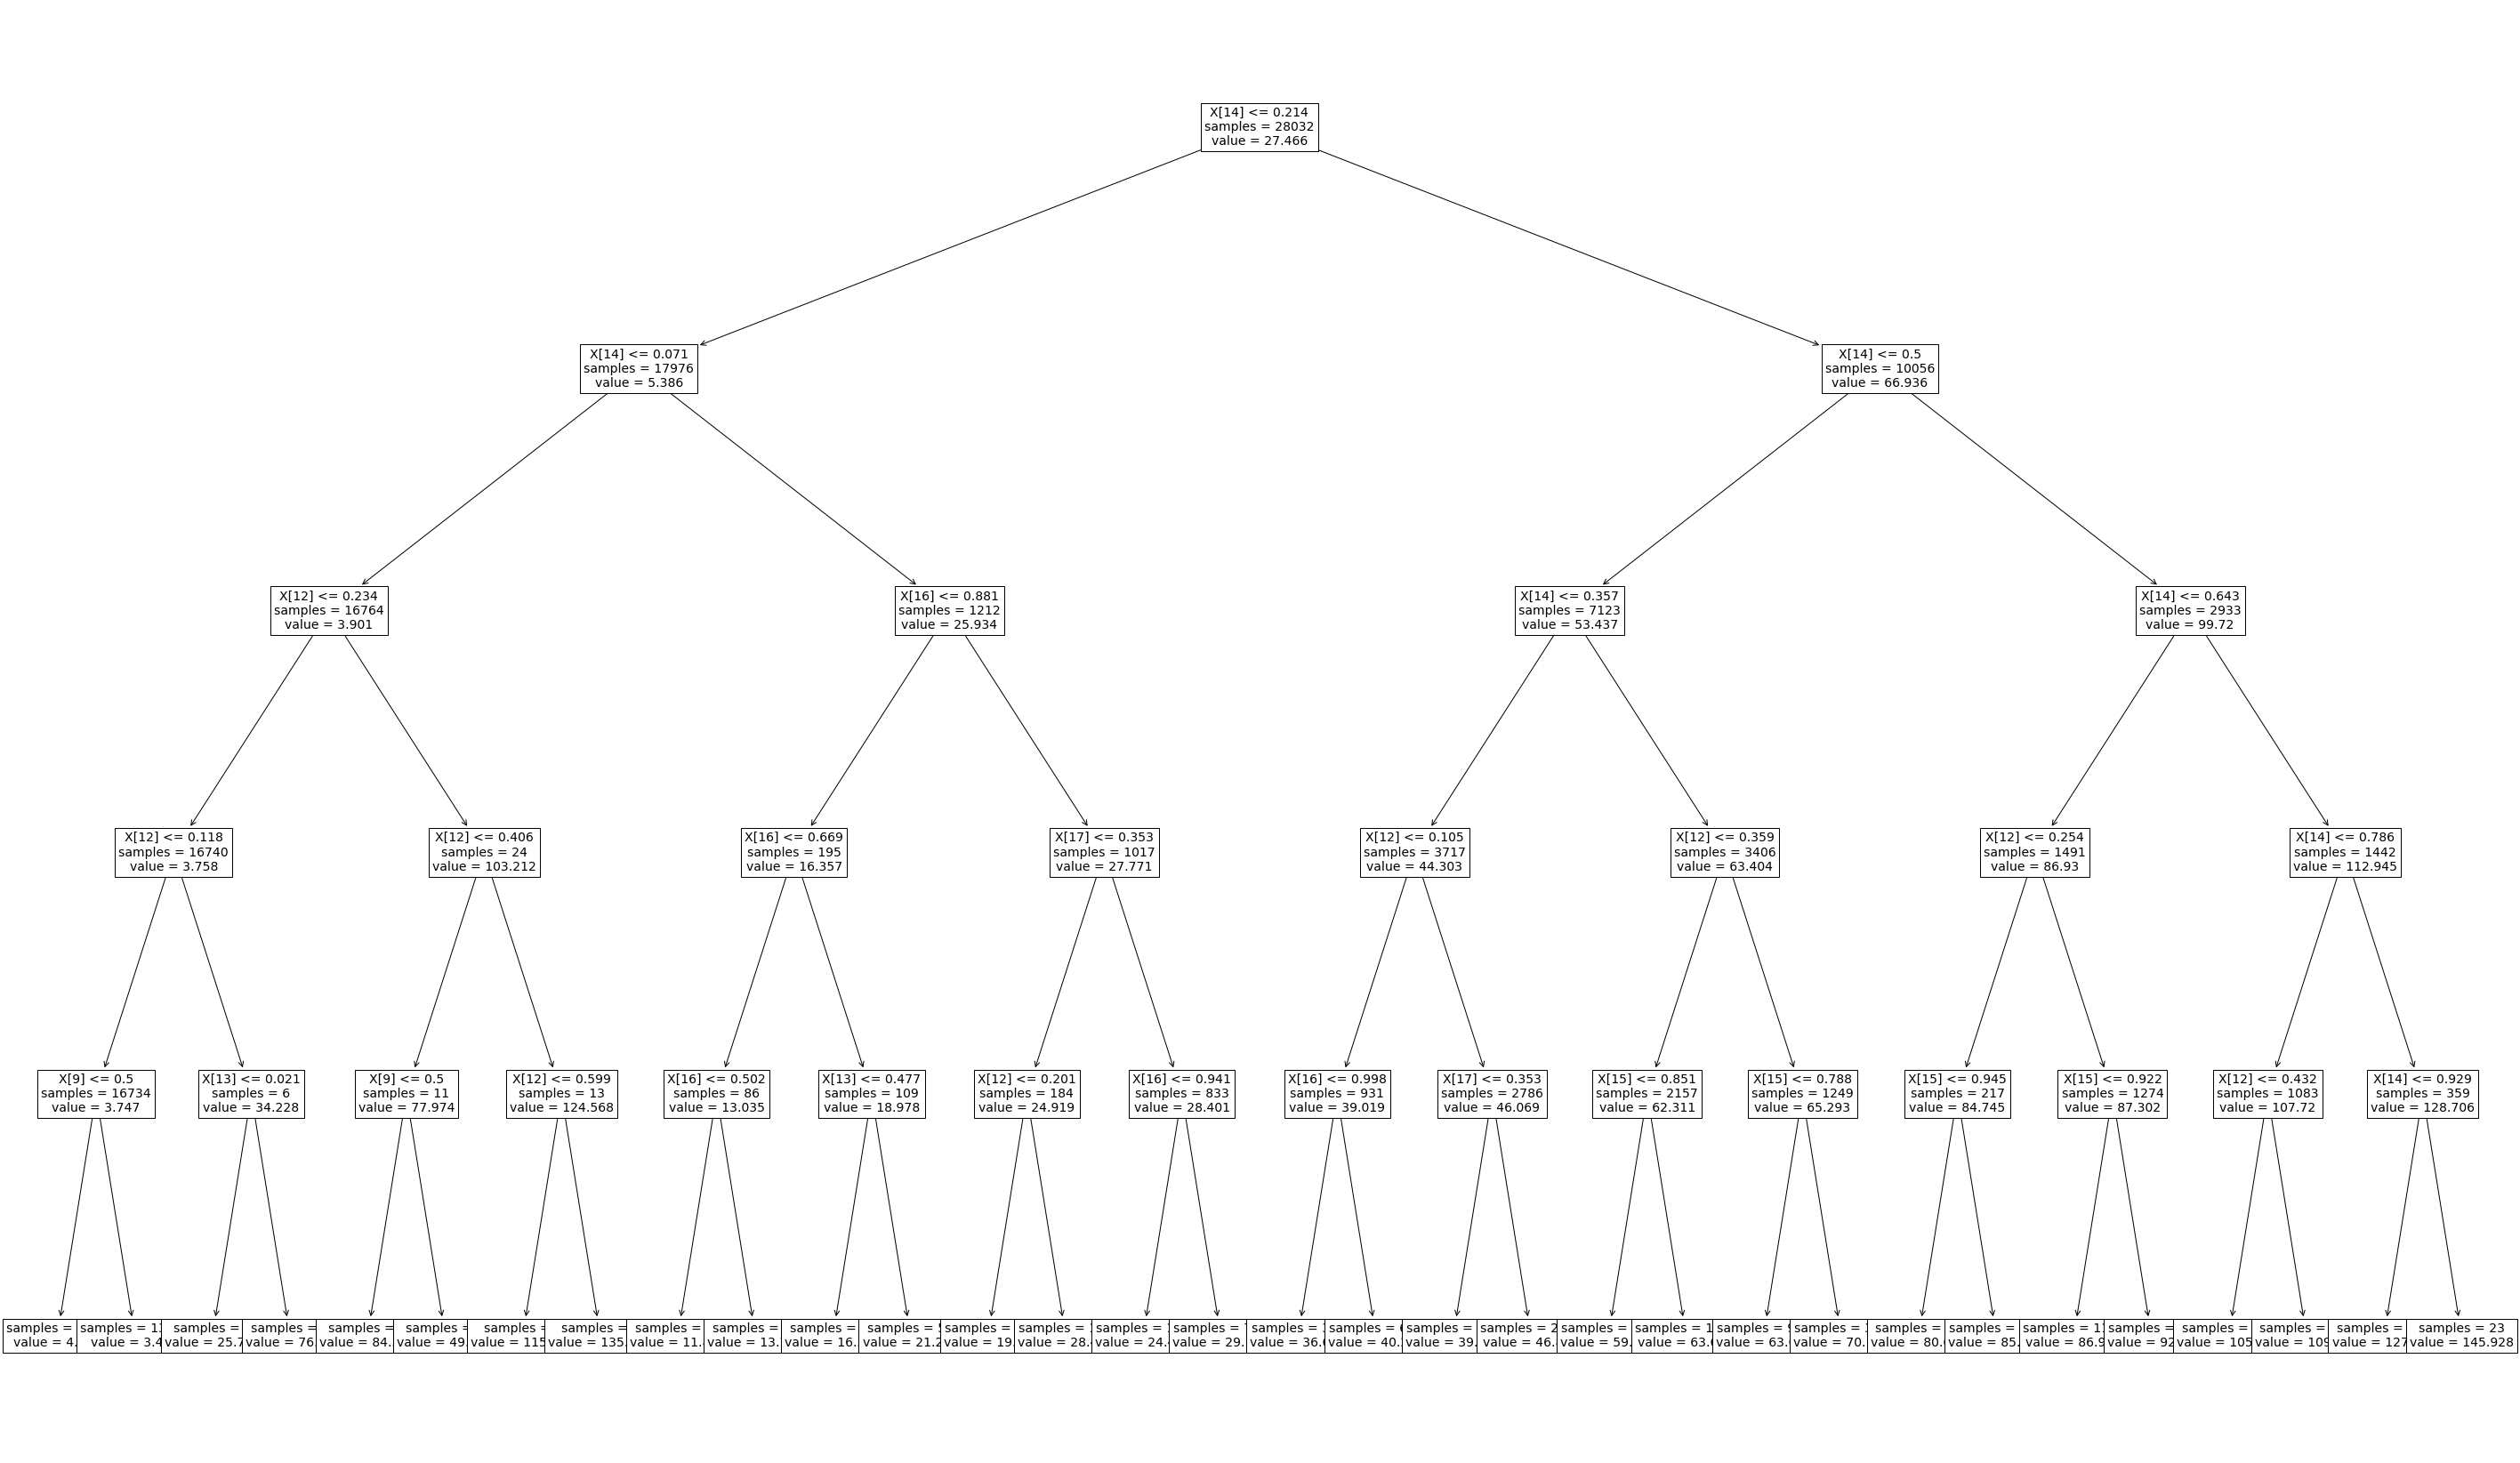

In [36]:
fig = plt.figure(figsize=(50, 30))
tree.plot_tree(pipeline.named_steps.regress, fontsize=14,impurity=False)

*Output Reflection*

The train & test RMSEs are pretty close, roughly 0.04 apart. When reviewing the values of the decision tree plotted out, there does seem to be some variety in some of the predicted results while others are very similar in result.

#*Conclusion--DecisionTree Regression*

Overall, this model is suitable for predicting kwh usage. When reviewing the DecisionTree with the regression algorithm, the values were mostly within smaller ranges with a couple of outliers.